<a href="https://colab.research.google.com/github/Anonymous3017/AI-ML-Training/blob/main/Day_15_Ayush_Track_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from ipywidgets import *

In [ ]:
ratings = pd.read_csv('/content/ratings.csv')

In [ ]:
movies = pd.read_csv('/content/movies.csv')

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [ ]:
movies.shape

(10329, 3)

In [ ]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [ ]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [ ]:
ratings.nunique()

userId         668
movieId      10325
rating          10
timestamp    84686
dtype: int64

In [ ]:
movies.nunique()

movieId    10329
title      10327
genres       938
dtype: int64

In [ ]:
#668 users
#10325 movie ids in ratings


In [ ]:
movies["genres"] = movies["genres"].str.split("|")

In [ ]:
movies["genres"]

0        [Adventure, Animation, Children, Comedy, Fantasy]
1                           [Adventure, Children, Fantasy]
2                                        [Comedy, Romance]
3                                 [Comedy, Drama, Romance]
4                                                 [Comedy]
                               ...                        
10324                        [Animation, Children, Comedy]
10325                                             [Comedy]
10326                                             [Comedy]
10327                                              [Drama]
10328                                 [(no genres listed)]
Name: genres, Length: 10329, dtype: object

In [ ]:
movies2 = movies.explode("genres")

In [ ]:
movies2.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy


In [ ]:
movies2["genres"].unique()

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'IMAX', 'War', 'Musical', 'Documentary',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [ ]:
movies2 = movies2[movies2["genres"]!= '(no genres listed)']

In [ ]:
movies2.nunique()

movieId    10322
title      10320
genres        19
dtype: int64

In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [ ]:
movies2

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Children
10324,146684,Cosmic Scrat-tastrophe (2015),Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy


In [ ]:
merged_info = pd.merge(ratings,movies2,on=["movieId"],how="inner")

In [ ]:
popularity_df =merged_info.groupby(["genres","title"]).agg({"rating":["mean","size"]}).reset_index()

In [ ]:
popularity_df.columns=["genres","title","avg_ratings","no. of ratings"]

In [ ]:
popularity_df.head()

,genres,title,avg_ratings,no. of ratings
0,Action,'71 (2014),3.500,1
1,Action,'Hellboy': The Seeds of Creation (2004),3.000,1
2,Action,10 to Midnight (1983),2.500,1
3,Action,12 Rounds (2009),2.875,4
4,Action,13 Assassins (Jûsan-nin no shikaku) (2010),3.500,5


In [ ]:
#genre = "Adventure"
#rating threshold = 2
#top

In [ ]:
popularity_df[(popularity_df["genres"]=="Adventure") & (popularity_df["no. of ratings"]>20)].sort_values(ascending=False,by="avg_ratings").head(5)

,genres,title,avg_ratings,no. of ratings
2457,Adventure,Nausicaä of the Valley of the Wind (Kaze no ta...,4.477273,22
2552,Adventure,Princess Mononoke (Mononoke-hime) (1997),4.384615,52
2428,Adventure,Monty Python and the Holy Grail (1975),4.301948,154
2474,Adventure,North by Northwest (1959),4.273973,73
2816,Adventure,"Treasure of the Sierra Madre, The (1948)",4.250000,26


In [ ]:
final = popularity_df[(popularity_df["genres"]=="Adventure") & (popularity_df["no. of ratings"]>20)].sort_values(ascending=False,by="avg_ratings").head(5)
final.drop('genres',axis=1)
final.reset_index()

,index,genres,title,avg_ratings,no. of ratings
0,2457,Adventure,Nausicaä of the Valley of the Wind (Kaze no ta...,4.477273,22
1,2552,Adventure,Princess Mononoke (Mononoke-hime) (1997),4.384615,52
2,2428,Adventure,Monty Python and the Holy Grail (1975),4.301948,154
3,2474,Adventure,North by Northwest (1959),4.273973,73
4,2816,Adventure,"Treasure of the Sierra Madre, The (1948)",4.250000,26


In [ ]:
def TopNPopularMovies(genre,num_threshold,topN):
  import warnings
  warnings.filterwarnings("ignore")
  #popularity df
  popularity_df = merged_info.groupby(["genres","title"]).agg({"rating":["mean","size"]}).reset_index()
  popularity_df.columns=["genres","title","avg_ratings","no. of ratings"]

  #filter data
  filtered_df = popularity_df[(popularity_df["genres"]==genre) & (popularity_df["no. of ratings"]>num_threshold)].sort_values(ascending=False,by="avg_ratings").head(topN)
  filtered_df = filtered_df.drop('genres',axis=1)
  filtered_df = filtered_df.reset_index()
  filtered_df = filtered_df.drop('index',axis=1)
  filtered_df = filtered_df.drop("avg_ratings",axis=1)
  filtered_df = filtered_df.drop("no. of ratings",axis=1)
  return filtered_df

In [ ]:
TopNPopularMovies("Adventure",7,5)

,title
0,Nausicaä of the Valley of the Wind (Kaze no ta...
1,Princess Mononoke (Mononoke-hime) (1997)
2,Monty Python and the Holy Grail (1975)
3,North by Northwest (1959)
4,"Treasure of the Sierra Madre, The (1948)"


In [ ]:
movies2

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Children
10324,146684,Cosmic Scrat-tastrophe (2015),Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy


In [ ]:
movies3 = movies2.groupby("title").agg({"genres": lambda x: " ".join(list(x))}).reset_index()

In [ ]:
movies3

,title,genres
0,'71 (2014),Action Drama Thriller War
1,'Hellboy': The Seeds of Creation (2004),Action Adventure Comedy Documentary Fantasy
2,'Round Midnight (1986),Drama Musical
3,'Til There Was You (1997),Drama Romance
4,"'burbs, The (1989)",Comedy
...,...,...
10315,loudQUIETloud: A Film About the Pixies (2006),Documentary
10316,xXx (2002),Action Crime Thriller
10317,xXx: State of the Union (2005),Action Crime Thriller
10318,¡Three Amigos! (1986),Comedy Western


In [ ]:
tf = TfidfVectorizer(analyzer="word",ngram_range=(1,3),stop_words="english",min_df=0)

In [ ]:
tf_matrix = tf.fit_transform(movies3["genres"])

In [ ]:
tf_matrix

<10320x597 sparse matrix of type '<class 'numpy.float64'>'
	with 44518 stored elements in Compressed Sparse Row format>

In [ ]:
#cosine_similarity

In [ ]:
cosine_sim = cosine_similarity(tf_matrix,tf_matrix)

In [ ]:
indices = pd.Series(movies3['title'].index,index=movies3['title'])

In [ ]:
indices

title
'71 (2014)                                           0
'Hellboy': The Seeds of Creation (2004)              1
'Round Midnight (1986)                               2
'Til There Was You (1997)                            3
'burbs, The (1989)                                   4
                                                 ...  
loudQUIETloud: A Film About the Pixies (2006)    10315
xXx (2002)                                       10316
xXx: State of the Union (2005)                   10317
¡Three Amigos! (1986)                            10318
À nous la liberté (Freedom for Us) (1931)        10319
Length: 10320, dtype: int64

In [ ]:
#Toy story
index = indices["Toy Story (1995)"]

In [ ]:
sim_score = cosine_sim[index]
list(enumerate(sim_score))

[(0, 0.0),
 (1, 0.08523498248083886),
 (2, 0.0),
 (3, 0.0),
 (4, 0.13129724316432967),
 (5, 0.0),
 (6, 0.03567220208744299),
 (7, 0.4318316465143841),
 (8, 0.0),
 (9, 0.050235901098503954),
 (10, 0.03567220208744299),
 (11, 0.050235901098503954),
 (12, 0.057966124016070465),
 (13, 0.04750827819431324),
 (14, 0.050235901098503954),
 (15, 0.2917769253786178),
 (16, 0.6964846697441013),
 (17, 0.03567220208744299),
 (18, 0.40369483869702805),
 (19, 0.0),
 (20, 0.29918796180849927),
 (21, 0.0),
 (22, 0.019206402336461165),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.06291308317909093),
 (30, 0.016951812643688488),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.2372685497183724),
 (35, 0.0),
 (36, 0.13983002091003893),
 (37, 0.0),
 (38, 0.10762846621009421),
 (39, 0.0),
 (40, 0.0),
 (41, 0.06296617662722356),
 (42, 0.07574565870959844),
 (43, 0.0),
 (44, 0.0),
 (45, 0.03207591544507681),
 (46, 0.0),
 (47, 0.0),
 (48, 0.13129724316432967),
 (49, 0.035672202087

In [ ]:
sorted_Scores = sorted(list(enumerate(sim_score)),key= lambda x:x[1],reverse=True)

In [ ]:
sorted_Scores

[(242, 1.0000000000000002),
 (550, 1.0000000000000002),
 (635, 1.0000000000000002),
 (1332, 1.0000000000000002),
 (2752, 1.0000000000000002),
 (2883, 1.0000000000000002),
 (6133, 1.0000000000000002),
 (8208, 1.0000000000000002),
 (8890, 1.0000000000000002),
 (9377, 1.0000000000000002),
 (9378, 1.0000000000000002),
 (9490, 1.0000000000000002),
 (10064, 1.0000000000000002),
 (8862, 0.8937209964057728),
 (9088, 0.8937209964057728),
 (3674, 0.8645951852315636),
 (8205, 0.8645951852315636),
 (1933, 0.8610003252639898),
 (6912, 0.8610003252639898),
 (7220, 0.8610003252639898),
 (438, 0.8403193635914471),
 (637, 0.8403193635914471),
 (1504, 0.8403193635914471),
 (3210, 0.8403193635914471),
 (4128, 0.8403193635914471),
 (4269, 0.8403193635914471),
 (4486, 0.8403193635914471),
 (4487, 0.8403193635914471),
 (4776, 0.8403193635914471),
 (4846, 0.8403193635914471),
 (5656, 0.8403193635914471),
 (6044, 0.8403193635914471),
 (6828, 0.8403193635914471),
 (6968, 0.8403193635914471),
 (7066, 0.84031936

In [ ]:
index_movies = [i[0] for i in sorted_Scores]

In [ ]:
index_movies[:10]

[242, 550, 635, 1332, 2752, 2883, 6133, 8208, 8890, 9377]

In [ ]:
movies3.iloc[2752]

title     DuckTales: The Movie - Treasure of the Lost La...
genres          Adventure Animation Children Comedy Fantasy
Name: 2752, dtype: object

In [ ]:
movies3[movies3.title=="Toy Story (1995)"]

,title,genres
9377,Toy Story (1995),Adventure Animation Children Comedy Fantasy


In [ ]:
def content_based(movie_title,topN):
  import warnings
  warnings.filterwarnings("ignore")
  indices = pd.Series(movies3['title'].index,index=movies3['title'])
  index = indices[movie_title]

  sim_score = cosine_sim[index]
  sorted_Scores = sorted(list(enumerate(sim_score)),key= lambda x:x[1],reverse=True)
  sorted_Scores = sorted_Scores[:topN]
  index_movies = [i[0] for i in sorted_Scores]
  matching_df = movies3.iloc[index_movies]
  matching_df.drop("genres",axis=1,inplace=True)
  return matching_df.reset_index(drop=True)

In [ ]:
content_based("'Hellboy': The Seeds of Creation (2004)",5)

,title
0,'Hellboy': The Seeds of Creation (2004)
1,Allan Quatermain and the Lost City of Gold (1987)
2,Armour of God (Long xiong hu di) (1987)
3,Armour of God II: Operation Condor (Operation ...
4,Austin Powers: International Man of Mystery (1...


# Tabs
# Dropdown
# button
# IntText

In [ ]:
# Function to handle button click event for Popularity Based recommendation
def recommend_popularity_based(button):
    genre = dropdown.value
    min_reviews = minReview.value
    num_recommendations = noOfRecommendation_Popularity.value

    recommendations = TopNPopularMovies(str(genre), min_reviews, num_recommendations)

    print("Popularity Based Recommendations:", recommendations)

In [ ]:
# Function to handle button click event for Content Based recommendation
def recommend_content_based(button):
    title = movieTitle.value
    num_recommendations = noOfRecommendation_Content.value

    recommendations = content_based(str(title), num_recommendations)

    print("Content Based Recommendations:", recommendations)

In [ ]:
import ipywidgets as widgets
# Tab widget
tab = widgets.Tab()

#my first tab
page1 = widgets.VBox([widgets.Label('Page 1')])

dropdown = widgets.Dropdown(
    options=['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'IMAX', 'War', 'Musical', 'Documentary',
       'Western', 'Film-Noir'],
    description="Genres",
    value="Adventure"
)


minReview = widgets.IntText(description="MIN REVIEWS")
noOfRecommendation_Popularity = widgets.IntText(description="Number Of Recommendation")

row = widgets.HBox([minReview,noOfRecommendation_Popularity])

#Button
buttonForPopularity = widgets.Button(
    description='Recommend Me',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)

page1.children = [dropdown,row,buttonForPopularity]

tab.set_title(0, 'Popularity Based')

# Second Tab
page2 = widgets.VBox([widgets.Label('Page 2')])
tab.set_title(1, 'Content Based')

#text area
movieTitle = widgets.Textarea(
    description='Movie Title:',
    disabled=False
)

buttonForContent = widgets.Button(
    description='Recommend Me',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)

noOfRecommendation_Content = widgets.IntText(description="Number Of Recommendation")

row2 = widgets.HBox([movieTitle,noOfRecommendation_Content])

page2.children = [row2,buttonForContent]

# Adding both pages
tab.children = [page1, page2]

# button activation
buttonForPopularity.on_click(recommend_popularity_based)
buttonForContent.on_click(recommend_content_based)

display(tab)

Popularity Based Recommendations:                                              title
0     My Neighbor Totoro (Tonari no Totoro) (1988)
1  Grand Day Out with Wallace and Gromit, A (1989)
2      Wallace & Gromit: The Wrong Trousers (1993)
3           Wallace & Gromit: A Close Shave (1995)
4                                        Up (2009)
Content Based Recommendations:                                                title
0       My Neighbor Totoro (Tonari no Totoro) (1988)
1                      Flight of Dragons, The (1982)
2  Kiki's Delivery Service (Majo no takkyûbin) (1...
3      Little Nemo: Adventures in Slumberland (1992)
4                              Watership Down (1978)
5             Snow White and the Seven Dwarfs (1937)


# Assignment
### for Day 15

#### Problem Statement: Image Classification using Tensorflow

This  problem  uses the  'Fashion  MNIST'dataset,which  contains  70,000 images of10 categoriesof apparel. The images show individual articles of clothing at low resolution (28 by 28 pixels)

Import the 'fashion_mnist'dataset using the tf.keras.datasets.fashion_mnist()commandand perform the following tasks:

1.Download and import Tensorflow and other required libraries

2.Import the MNIST fashion test and train data using kerasalong with the train and test labels

3.Define  the  class  names  as -['T-shirt/top',  'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']for eachcategory of articles

4.Analyze the train and test data by printing their respective sizes

5.Scale  the  test  and  train  image  datasets  by  dividing  with thesame number

6.Display the scaled data using matplotlib

7.Define  a Kerasmodel  with a 'relu' (Rectified  Linear  Unit) activation function

8.Train the model using the train dataset

9.Test the model and print the test accuracy

10.Predictto test the model

11.Definea function thatuses the model to predict whether it's a shoe, shirt, pant,....etc. and test the model by using a sample image from the test datasetDataset:


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(x_train, x_test), (y_train, y_test) = fashion_mnist.load_data()

In [ ]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
len(classes)

10

In [ ]:
x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 222, 209, 203, 215, 200,   0,  70,  98,
          0, 103,  59,  68,  71,  49,   0, 219, 206, 214, 210, 250,  38,
          0,   0],
       [  0,   0,   0,   0, 247, 218, 212, 210, 215, 214,   0, 254, 243,
        139, 255, 174, 251, 255, 205,   0, 215, 217, 214, 208, 220,  95,
          0,   0],
       [  0,   0,   0,  45, 226, 214, 214, 215, 224, 205,   0,  42,  35,
         60,  16,  17,  12,  13,  70,   0, 189, 216, 212, 206, 212, 156,
          0,   0],
       [  0,   0,   0, 164, 235, 214, 211, 220, 216, 201,  52,  71,  89,
         94,  83,  78,  70,  76,  92,  87, 206, 207, 222, 213, 219, 208,
          0,   0],
       [  0,   0,   0, 106, 187, 223, 237, 248, 211, 198, 252, 250, 248,
        245, 248, 252, 253, 250, 252, 239, 201, 212, 225, 215, 193, 113,
          0,   0],
       [  0,   0,   0,   0,   0,  17,  54, 159, 222, 193, 208, 192, 197,
        200, 200, 200, 200, 201, 203, 195, 210, 165,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  47, 225, 192, 214, 203, 206,
        204, 204, 205, 206, 204, 212, 197, 218, 107,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   6,   0,  46, 212, 195, 212, 202, 206,
        205, 204, 205, 206, 204, 212, 200, 218,  91,   0,   3,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  11, 197, 199, 205, 202, 205,
        206, 204, 205, 207, 204, 205, 205, 218,  77,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   2, 191, 198, 201, 205, 206,
        205, 205, 206, 209, 206, 199, 209, 219,  74,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 188, 197, 200, 207, 207,
        204, 207, 207, 210, 208, 198, 207, 221,  72,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 215, 198, 203, 206, 208,
        205, 207, 207, 210, 208, 200, 202, 222,  75,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 212, 198, 209, 206, 209,
        206, 208, 207, 211, 206, 205, 198, 221,  80,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 201, 205, 208, 207,
        205, 211, 205, 210, 210, 209, 195, 221,  96,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 202, 201, 205, 209, 207,
        205, 213, 206, 210, 209, 210, 194, 217, 105,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 204, 205, 208, 207,
        205, 215, 207, 210, 208, 211, 193, 213, 115,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 204, 207, 207, 208, 206,
        206, 215, 210, 210, 207, 212, 195, 210, 118,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 198, 208, 208, 208, 204,
        207, 212, 212, 210, 207, 211, 196, 207, 121,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   

In [ ]:
classes[x_test[1]]

'T-shirt/top'

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (60000,)
assert y_train.shape == (10000, 28, 28)
assert y_test.shape == (10000,)

In [ ]:
#scaled daat
x_train = x_train/255
y_train = y_train/255

<function matplotlib.pyplot.show(close=None, block=None)>

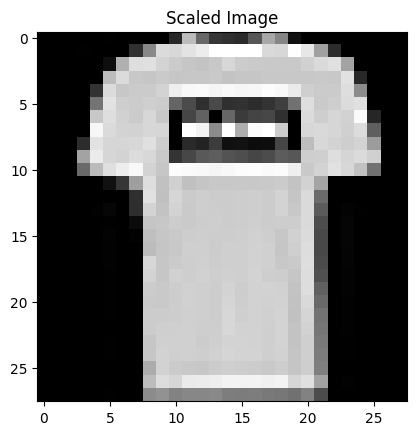

In [ ]:
plt.imshow(x_train[1], cmap='gray')
plt.title('Scaled Image')
plt.show

In [ ]:
#Neural network Model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train,x_test,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 140s 74ms/step - loss: 0.4775 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 143s 76ms/step - loss: 0.3583 - accuracy: 0.8676
Epoch 3/10
1875/1875 [==============================] - 144s 77ms/step - loss: 0.3216 - accuracy: 0.8794
Epoch 4/10
1875/1875 [==============================] - 144s 77ms/step - loss: 0.2965 - accuracy: 0.8890
Epoch 5/10
1875/1875 [==============================] - 145s 77ms/step - loss: 0.2795 - accuracy: 0.8959
Epoch 6/10
1875/1875 [==============================] - 144s 77ms/step - loss: 0.2624 - accuracy: 0.9019
Epoch 7/10
1875/1875 [==============================] - 135s 72ms/step - loss: 0.2513 - accuracy: 0.9046
Epoch 8/10
1875/1875 [==============================] - 136s 72ms/step - loss: 0.2397 - accuracy: 0.9101
Epoch 9/10
1875/1875 [==============================] - 136s 73ms/step - loss: 0.2311 - accuracy: 0.9118
Epoch 10/10
1875/1875 [==============================] 

In [ ]:
model.evaluate(y_train,y_test)

313/313 [==============================] - 8s 24ms/step - loss: 0.3409 - accuracy: 0.8891


[0.3408971130847931, 0.8891000151634216]

In [ ]:
y_pred = model.predict(y_train)

313/313 [==============================] - 6s 20ms/step


In [ ]:
np.argmax(y_pred[0])

9

In [ ]:
def show(i):
  plt.imshow(x_train[i])
  print(classes[x_test[i]])

Sandal


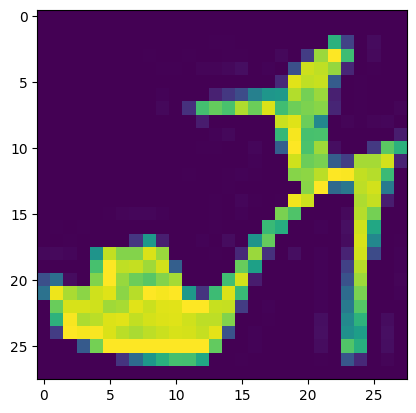

In [ ]:
show(9)

In [ ]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[774,   0,  26,  32,   3,   0, 159,   0,   6,   0],
       [  1, 976,   0,  14,   3,   0,   5,   1,   0,   0],
       [  8,   1, 785,  10,  90,   0, 104,   0,   2,   0],
       [  7,  12,  11, 900,  34,   0,  31,   0,   5,   0],
       [  1,   0,  87,  28, 807,   0,  77,   0,   0,   0],
       [  0,   0,   0,   0,   0, 965,   0,  16,   1,  18],
       [ 65,   0,  48,  33,  55,   0, 793,   0,   6,   0],
       [  0,   0,   0,   0,   0,   9,   0, 937,   0,  54],
       [  4,   0,   1,   6,   2,   1,   4,   4, 978,   0],
       [  0,   0,   0,   0,   0,   4,   1,  19,   0, 976]], dtype=int32)>

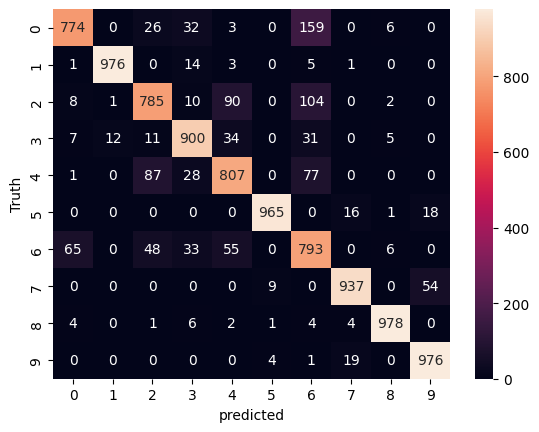

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("predicted")
plt.ylabel("Truth")
plt.show()